In [40]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", 100)

In [2]:
df = pd.read_csv(r"D:\data_analytics\Python practice\project (2)\amazon_prime_titles.csv")

In [197]:
df.sample(15).T

,7278,6244,5633,7410,1457,8362,4758,3124,8981,894,3612,3470,151,6445,7485
show_id,s7279,s6245,s5634,s7411,s1458,s8363,s4759,s3125,s8982,s895,s3613,s3471,s152,s6446,s7486
type,Movie,Movie,TV Show,TV Show,Movie,Movie,Movie,TV Show,Movie,Movie,Movie,Movie,Movie,TV Show,Movie
title,Not That Funny,Ester Steinberg: Burning Bush,Elzaz,Dragon King Legend .Born Disappeared Martial Soul,Nursery Rhymes Volume 10 by Little Baby Bum - ...,Final Stop,Swargakkunnile Kuriakose,BEATLESS,Best Night Ever,Steve Treviño: My Life In Quarantine,Nightmare At Bitter Creek,30 Minutes on the Central California Coast,War of Likes,Socially Distanced,Miracle on the Mountain: The Kincaid Family Story
director,Lauralee Farrer,Brian Volk-Weiss,NaN,NaN,Cannis Holder,Jeffrey J. Moore,Emmanuvel N K,NaN,magnolia,Rick Cikowski,Tim Burstall,David Hessemer,María Ripoll,NaN,Michael Switzer
cast,"Tony Hale, Brigid Brannagh, K Callan, Timothy ...",Ester Steinberg,"Thomas Ross, Amy Louise Kemp, Tamera Gandoff, ...",NaN,"Grace Tamayo, Erin Webbs","Vince Rodriguez, Kelly McCart, Kamy D. Bruder,...","Rajeesh Puttad, Sindhya Viswanath, Jaya Babu, ...","Takuto Yoshinaga, Nao Toyama, Misako Tomioka, ...","Desiree Hall, Samantha Colburn, Eddie Ritchard...","Steve Treviño, Renae Treviño","Lindsay Wagner, Tom Skerritt, Constance McCash...",NaN,"Ludwika Paleta, Regina Blandón, Manolo Cardona...","Jeff Willy, Kirsten Trammell, Priya Gopalan, L...","William Devane, Patty Duke"
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,2014,2021,2021,2021,2018,2021,2018,2018,2014,2020,1988,2018,2021,2020,2000
rating,PG-13,18+,16+,13+,ALL,16+,13+,TV-NR,R,18+,16+,ALL,16+,16+,16+
duration,99 min,54 min,1 Season,1 Season,49 min,89 min,102 min,1 Season,82 min,72 min,92 min,30 min,104 min,1 Season,90 min


In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [199]:
df.shape


(9668, 12)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [201]:
df.isna().sum().sort_values(ascending = False)

date_added      9513
country         8996
director        2083
cast            1233
rating           337
title              0
show_id            0
type               0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

In [202]:
df["show_id"].nunique() 

9668

In [203]:
#df.sample(15).T

In [204]:
df.nunique().sort_values()

type               2
rating            24
date_added        84
country           86
release_year     100
duration         219
listed_in        518
director        5773
cast            7927
description     9414
show_id         9668
title           9668
dtype: int64

In [205]:
df["rating"].value_counts()
df["type"].value_counts()

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

In [206]:
df["duration"].sample(10)

7574       85 min
7562     1 Season
1962     1 Season
2033      105 min
9533      106 min
2463      106 min
7437      135 min
8885       83 min
6117      120 min
6488    2 Seasons
Name: duration, dtype: object

In [207]:
df["date_added"].sample(10)

1080    NaN
6584    NaN
6586    NaN
5176    NaN
7805    NaN
1586    NaN
7527    NaN
9050    NaN
3252    NaN
9646    NaN
Name: date_added, dtype: object

In [208]:
df[['listed_in', 'country']].sample(10)

,listed_in,country
5187,"Horror, Suspense",NaN
6621,Suspense,NaN
6634,Unscripted,NaN
3789,"Action, Adventure, Suspense",NaN
1051,"Documentary, Special Interest",NaN
4342,Kids,NaN
1939,"Documentary, Suspense",NaN
6521,"Action, Comedy, Drama",NaN
3598,Comedy,NaN
8777,"Comedy, Drama, Kids",NaN


In [ ]:
# (Initial Data Quality Assessment)


# The dataset contains 9,668 titles with complete identifiers and descriptions, making it suitable for catalog-level analysis.
# Key metadata fields such as date_added (~98% missing) and country (~93% missing) are sparsely populated, limiting the reliability of acquisition timing and regional strategy insights.
# Duration values are stored in mixed units (minutes for movies, seasons for TV shows), requiring normalization prior to format-based analysis.
# Genre (listed_in) and country fields are multi-valued, necessitating splitting and expansion to accurately assess distribution and overlap.
# Missing director and cast information suggests a portion of the catalog consists of older or lower-priority licensed content.
# Rating data is mostly complete but fragmented across categories, supporting only high-level audience analysis.

In [3]:
df_raw = df.copy()
df_raw.shape == df.shape

"""To preserve the integrity of the raw dataset, a working copy of the data is created before performing any cleaning or feature engineering.
This ensures that the original data remains unchanged and provides a clear reference point for all transformations applied during the analysis."""


'To preserve the integrity of the raw dataset, a working copy of the data is created before performing any cleaning or feature engineering.\nThis ensures that the original data remains unchanged and provides a clear reference point for all transformations applied during the analysis.'

In [4]:
# Additionally, explicit format indicators are derived from the 'type' column to clearly distinguish between Movies and TV Shows.
# This separation is necessary because several attributes (such as duration and content lifecycle) are interpreted differently depending
# on the content format.

df["is_movie"] = (df["type"] == "Movie").astype(int)
df["is_tv_show"] = (df["type"] == "TV Show").astype(int)

# checkpont

df[["type", "is_movie", "is_tv_show"]].sample(5)

,type,is_movie,is_tv_show
1904,Movie,1,0
39,Movie,1,0
5909,Movie,1,0
4282,Movie,1,0
139,Movie,1,0


In [5]:
# Creating empty columns

df["duration_minutes"] = np.nan
df["num_season"] = np.nan


In [ ]:
df["director"] = df["director"].str.strip().str.title()

0                 Comedy, Drama
1          Drama, International
2       Action, Drama, Suspense
3                   Documentary
4                Drama, Fantasy
                 ...           
9663                     Comedy
9664                   TV Shows
9665                     Action
9666              Drama, Sports
9667    Action, Drama, Suspense
Name: listed_in, Length: 9668, dtype: object

In [6]:
# Duration Normalization by Content Format

# The 'duration' column contains mixed units depending on content format (minutes for movies and seasons for TV shows). 
# To enable meaningful analysis, duration values are parsed into separate numeric fields: movie durations are converted to minutes, 
# while TV show durations are represented by the number of seasons. This separation ensures that format-specific comparisons and 
# lifecycle analysis are accurate and interpretable.


movie_mask = df["is_movie"] == 1

df.loc[movie_mask, "duration_minutes"] = (
df.loc[movie_mask, "duration"]
.str.extract(r'(\d+)')[0]
.astype(float)
)

# --------------------------------------------------------

tv_show_mask = df["is_tv_show"] == 1

df.loc[tv_show_mask, "num_season"] = (
    df.loc[tv_show_mask, "duration"]
    .str.extract(r'(\d+)')[0]
    .astype(float)
)

# CHECK
df[["type", "duration", "duration_minutes", "num_season"]].sample(10)

,type,duration,duration_minutes,num_season
537,Movie,11 min,11.0,NaN
1575,Movie,74 min,74.0,NaN
9009,Movie,83 min,83.0,NaN
7513,Movie,65 min,65.0,NaN
7619,Movie,103 min,103.0,NaN
895,Movie,65 min,65.0,NaN
6374,Movie,91 min,91.0,NaN
7132,Movie,95 min,95.0,NaN
788,Movie,0 min,0.0,NaN
2551,Movie,44 min,44.0,NaN


In [38]:
# splitting genres
df["genre_list"] = df["listed_in"].str.split(",")

df["genre_list"] = df["genre_list"].apply(                       # removing leading trailing spaces
    lambda x:[g.strip() for g in x] if isinstance(x,list) else x
    )

# splitting country
df["country_list"] = df["country"].fillna("").str.split(",")

df["country_list"] = df["country_list"].apply(                       # removing leading trailing spaces
    lambda x:[g.strip() for g in x] if isinstance(x,list) else x
    )

# check
df[["listed_in", "genre_list", "country", "country_list",]].sample(10)
df["country_list"].value_counts()

country_list
[]                                                            8996
[United States]                                                253
[India]                                                        229
[United Kingdom]                                                28
[Canada]                                                        16
[United Kingdom, United States]                                 12
[Spain]                                                          8
[Italy]                                                          8
[Canada, United States]                                          7
[United States, United Kingdom]                                  6
[Germany]                                                        5
[India, United States]                                           5
[Australia]                                                      4
[United States, Canada]                                          4
[France]                                         

In [39]:
# Genre and Country Normalization

# Genres and countries are multi-valued fields. To enable accurate distribution and overlap analysis, these columns 
# are converted into lists and exploded so that each row represents a single genre or country per title. This structure allows 
# meaningful aggregation, cross-tabulation, and strategic insights into content composition and regional presence.

df_genre = df.explode("genre_list")
df_country = df.explode("country_list")

df_genre["genre_list"].value_counts().head()
df_country["country_list"].value_counts().head()

country_list
                  8996
United States      334
India              246
United Kingdom      67
Canada              35
Name: count, dtype: int64

In [9]:
# Content Age and Freshness Metrics

# To assess catalog freshness and lifecycle risk, content age is calculated using release year as a reliable indicator of how old each title is. 
# Additionally, the date added field is parsed to estimate how recently content entered the platform, acknowledging that this metric is available only 
# for a limited subset of titles. These time-based features enable analysis of catalog aging, refresh patterns, and format-specific lifecycle trends.


current_year = datetime.now().year

df["content_age"] = current_year - df["release_year"]

# ---------------------------------------------------------------------------

df["date_added_parse"] = pd.to_datetime(df["date_added"], errors = "coerce")

df["year_since_added"] = current_year - df["date_added_parse"].dt.year

# CHECK 

df[["title", "year_since_added", "content_age"]].sample(10)

,title,year_since_added,content_age
2281,GT Serie 1,NaN,9
5789,Rolling Stones - Sticky Fingers Live At The Fo...,NaN,8
8542,Last Patrol on Okinawa,NaN,4
279,Tough Guy: The Bob Probert Story,NaN,6
6827,At the Fork,NaN,9
1274,Powder Blue,NaN,16
338,Tiger Zinda Hai,NaN,8
1383,Paper Planes,NaN,10
2101,Inside Italy's COVID War,NaN,5
4978,Deadly Game,NaN,9


In [58]:
content_mix = (
    df["type"]
    .value_counts(normalize= True)
    .mul(100)
    .round(2)
    .reset_index()
)
content_mix.columns =["content_type", "content_percent"]
content_mix

,content_type,content_percent
0,Movie,80.82
1,TV Show,19.18


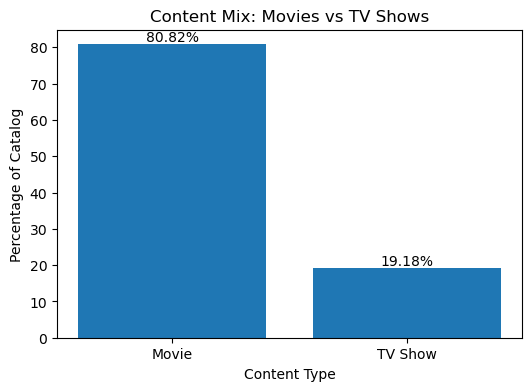

In [59]:
# ------------------------------------------------------------------\
plt.figure(figsize=(6, 4))
bars = plt.bar(content_mix['content_type'], content_mix['content_percent'])

plt.title('Content Mix: Movies vs TV Shows')
plt.ylabel('Percentage of Catalog')
plt.xlabel('Content Type')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height}%',
        ha='center',
        va='bottom')
plt.show()  